# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15000)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

2939

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city = cities[0]
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
city_data= requests.get(city_url).json()
pprint(city_data)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 14.8961, 'lon': -24.4956},
 'dt': 1611942534,
 'id': 3374210,
 'main': {'feels_like': 297.91,
          'grnd_level': 1002,
          'humidity': 55,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 298.69,
          'temp_max': 298.69,
          'temp_min': 298.69},
 'name': 'São Filipe',
 'sys': {'country': 'CV', 'sunrise': 1611907625, 'sunset': 1611948900},
 'timezone': -3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 77, 'speed': 3.86}}


In [6]:
name = city_data["name"]
lat = city_data['coord']['lat']
lng = city_data['coord']['lon']
max_temp = city_data['main']['temp_max']
humidity = city_data['main']['humidity']
cloudiness = city_data['weather'][0]['id']
wind_speed = city_data['wind']['speed']
date = city_data['dt']
country = city_data['sys']['country']
print(country)

CV


In [7]:
#Create dictionary and lists
global_weather = {}
names = []
lats = []
lngs = []
max_temps = []
humidities = []
clouds = []
speeds = []
dates = []
countries = []

for city in cities[0:20]:
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    try:
    
        city_data = requests.get(city_url).json()
        names.append(city_data["name"])
        lats.append(city_data['coord']['lat'])
        lngs.append(city_data['coord']['lon'])
        max_temps.append(city_data['main']['temp_max'])
        humidities.append(city_data['main']['humidity'])
        clouds.append(city_data['weather'][0]['id'])
        speeds.append(city_data['wind']['speed'])
        countries.append(city_data['sys']['country'])
        dates.append(city_data['dt'])
    
    except: 
        pass  

global_weather['Name'] = names
global_weather['Latitude'] = lats
global_weather['Longitude'] = lngs
global_weather['Max Temp'] = max_temps
global_weather['Humidity'] = humidities
global_weather['Cloudiness'] = clouds
global_weather['Wind Speed'] = speeds
global_weather['Country'] = countries
global_weather['Date'] = dates

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_summary = pd.DataFrame(global_weather)
pd.to_numeric(weather_summary['Latitude']).astype(float)
pd.to_numeric(weather_summary['Longitude']).astype(float)
pd.to_numeric(weather_summary['Max Temp']).astype(float)
pd.to_numeric(weather_summary['Humidity']).astype(float)
pd.to_numeric(weather_summary['Cloudiness']).astype(float)
pd.to_numeric(weather_summary['Wind Speed']).astype(float)
weather_summary

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São Filipe,14.8961,-24.4956,298.69,55,804,3.86,CV,1611942534
1,Tabora,-5.0167,32.8000,293.54,83,500,1.10,TZ,1611942534
2,Abhā,18.2164,42.5053,288.15,77,800,5.14,SA,1611942534
3,Rāzole,16.4833,81.8333,293.88,91,803,1.15,IN,1611942535
4,Guerrero Negro,27.9769,-114.0611,290.59,56,800,3.90,MX,1611942535
5,Vredendal,-31.6683,18.5012,292.48,65,800,7.31,ZA,1611942535
6,Qaanaaq,77.4840,-69.3632,247.19,59,800,2.05,GL,1611942536
7,Punta Arenas,-53.1500,-70.9167,282.15,53,803,9.26,CL,1611942536
8,Qasigiannguit,68.8193,-51.1922,256.15,51,800,2.06,GL,1611942536
9,Kaitangata,-46.2817,169.8464,279.08,92,801,2.75,NZ,1611942536


In [11]:
weather_summary.to_csv("Output Data/cities.csv")

In [100]:
weather_summary

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Aksu,41.1231,80.2644,266.05,83,800,1.13,1611855992
1,Avarua,-21.2078,-159.7750,300.15,83,802,4.12,1611856002
2,Taltal,-25.4000,-70.4833,294.92,60,802,3.32,1611856003
3,Caucayá,-0.1934,-74.7819,306.14,45,802,2.33,1611856003
4,Punta Arenas,-53.1500,-70.9167,283.15,62,500,9.77,1611856003
5,Pachino,36.7186,15.0907,285.15,87,803,1.54,1611856004
6,Prescott,34.5400,-112.4685,278.15,70,804,1.31,1611855935
7,Dikson,73.5069,80.5464,237.86,80,803,3.00,1611856005
8,Bāndarban,22.1965,92.2262,287.03,62,800,0.82,1611856005
9,George Town,5.4112,100.3354,299.15,94,802,1.54,1611856005


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [95]:
# Find summary stats for each column
weather_numeric = pd.to_numeric
# mean = (weather_summary.mean().astype(int))
mean = weather_data_clean.mean()
std = weather_data_clean.std()
minimum = weather_data_clean.min()
maximum = weather_data_clean.max()
quartiles = weather_summary.quantile([.25,.5,.75])
# lowerq = quartiles[0.25].round(2)
# upperq = quartiles[0.75].round(2)
# iqr = (upperq-lowerq).round(2)
# lower_bound = (lowerq - (1.5*iqr)).round(2)
# upper_bound = (upperq + (1.5*iqr)).round(2)


1

In [97]:
# Gather stats in summary dataframe
weather_stats = pd.DataFrame({'Mean' : mean,
                             'Standard Deviation' : std,
                             'Minimum' : minimum,
                             'Maximum' : maximum}).transpose()
weather_stats

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Name,Wind Speed
Mean,785.444,1.61186e+09,73.2222,20.2566,-13.6751,278.019,NaN,3.30556
Standard Deviation,71.2504,72.3544,14.5423,37.8398,102.402,21.8683,NaN,2.64868
Minimum,500,1611855713,45,-53.15,-159.775,232.35,Aksu,0.51
Maximum,804,1611856007,94,73.5069,147.329,306.14,Yerbogachën,9.77


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [27]:
#  Get the indices of cities that have humidity over 100%.

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_summary.drop(weather_summary[weather_summary['Humidity'] >100].index, inplace = False)
clean_city_data

,Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,São Filipe,14.8961,-24.4956,298.69,55,804,3.86,CV,1611942534
1,Tabora,-5.0167,32.8000,293.54,83,500,1.10,TZ,1611942534
2,Abhā,18.2164,42.5053,288.15,77,800,5.14,SA,1611942534
3,Rāzole,16.4833,81.8333,293.88,91,803,1.15,IN,1611942535
4,Guerrero Negro,27.9769,-114.0611,290.59,56,800,3.90,MX,1611942535
5,Vredendal,-31.6683,18.5012,292.48,65,800,7.31,ZA,1611942535
6,Qaanaaq,77.4840,-69.3632,247.19,59,800,2.05,GL,1611942536
7,Punta Arenas,-53.1500,-70.9167,282.15,53,803,9.26,CL,1611942536
8,Qasigiannguit,68.8193,-51.1922,256.15,51,800,2.06,GL,1611942536
9,Kaitangata,-46.2817,169.8464,279.08,92,801,2.75,NZ,1611942536


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [28]:
# challenge: create custom function, "template," so I can run just one line of code (include savefig)

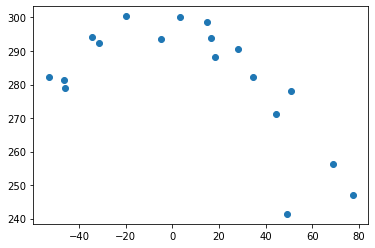

In [16]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])


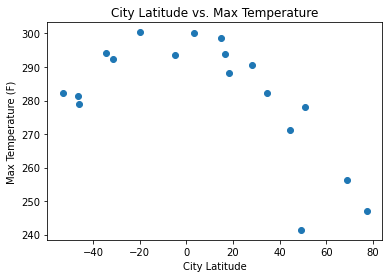

In [17]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Max Temp'])
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

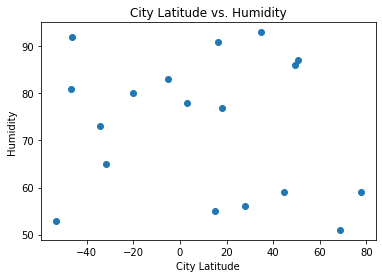

In [18]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity'])
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

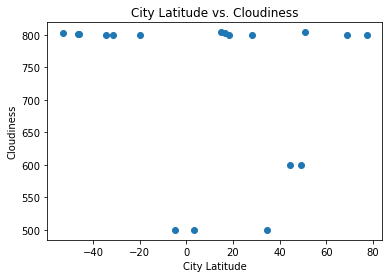

In [19]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Cloudiness'])
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

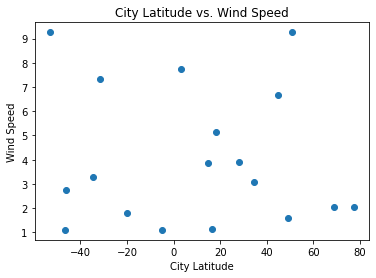

In [21]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [22]:
northern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) > 0, :]
southern_df = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

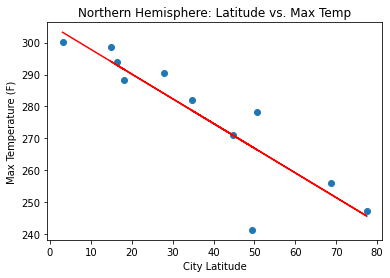

Regression = y = -0.77x + 305.59
R-Value = -0.8832374112990168


In [44]:
x = northern_df['Latitude']
y = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

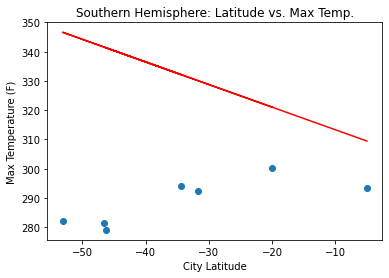

Regression = y = 0.38x + 301.77
R-Value = 0.7857112583668621


In [45]:
x = southern_df['Latitude']
y = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Max Temp.')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression = y = -0.2x + 79.54


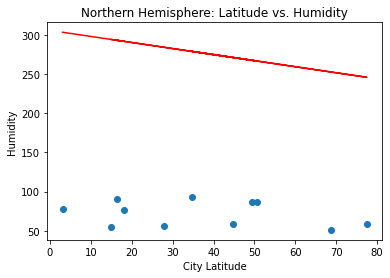

Regression = y = -0.2x + 79.54
R-Value = -0.297880143297455


In [46]:
x = northern_df['Latitude']
y = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression = {line_eq}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

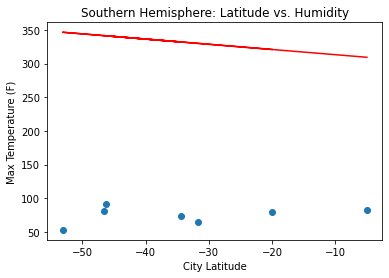

Regression = y = 0.24x + 83.49
R-Value = 0.3172002765292133


In [49]:
x = southern_df['Latitude']
y = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

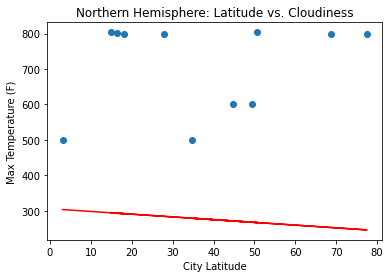

Regression = y = 1.21x + 665.27
R-Value = 0.21858229292631637


In [47]:
x = northern_df['Latitude']
y = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


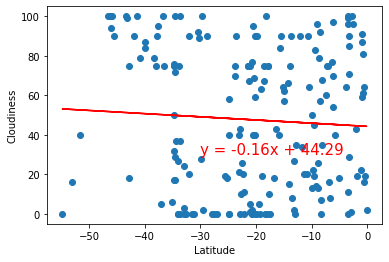

In [30]:
x = southern_df['Latitude']
y = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression = y = -0.03x + 5.31


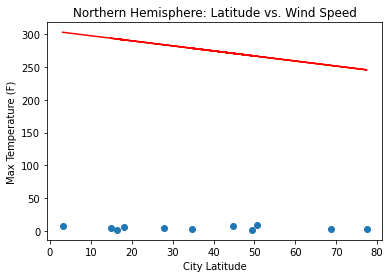

Regression = y = -0.03x + 5.31
R-Value = -0.2553437340688444


In [48]:
x = northern_df['Latitude']
y = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression = {line_eq}")
# print(result.intercept,result.intercept_stderr)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

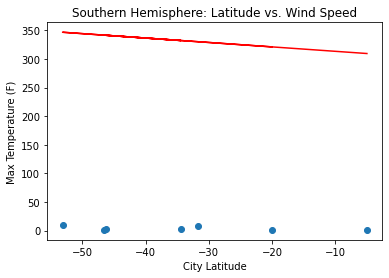

Regression = y = -0.09x + 0.73
R-Value = -0.4769918451115848


In [50]:
x = southern_df['Latitude']
y = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x, y, 'o', label='original data')
plt.plot(x, result.intercept + result.slope*x, 'r', label='fitted line')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')
plt.show()
print(f"Regression = {line_eq}")
print(f"R-Value = {rvalue}")